In [1]:
#%%
%load_ext autoreload
%autoreload 2
import loader
import processor
import config
import controller
import models

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
loader.valid_ss_knot(input='./data/final_data6.txt',output='./data/final_data6_valid.txt')

This function is used to remove invalid SMILES...
Load 6338 records, remove 0 invalid smiles...
Remain 6338 records finally...
Completed!


In [4]:
import random
import torch
import os
import numpy as np
def fix_seed(seed):
    """
    Seed all necessary random number generators.
    """
    #if seed is None:
    #    seed = random.randint(1, 10000)
    torch.set_num_threads(1)  # Suggested for issues with deadlocks, etc.
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.enabled = True

In [5]:
fix_seed(1)

# 数据分割方式改变

In [6]:
drug_encoding, target_encoding = 'DGL_GIN_AttrMasking', 'Prism'

In [7]:
train, val, test=loader.split_drug(input='./data/final_data6_valid.txt', random_seed=1)

This function is used to convert two columns tabular format to complete adjacency matrix...
splitting dataset...


In [8]:
train

,AAAAACACAGGUCUCUGCUAAACCGUAAGGU@(((((((((.(...((....((....(((((@...............................,AAAAAGGUACAGCUUUUUAGAAACGGAUACA@((((((......(((((((((...((.....@...............................,AAAAAGUACGUGAAAUUGUUGAAAGGGAAGG@........((.....((((((((((.....(@...............................,AAAAAGUAUUUUGAACGGACCUCUGUUUGAC@...(..(...(...(((((...(((...(((@...............................,AAAACAAAGUCCUUUCUGCCAAAGUUGGUAC@.((((...((((...........((((((((@.............[[[[[[[...........,AAAACAAAGUCCUUUCUGCCAAAGUUGGUAC@.((((...((((...........((((((..@.............[[[[[[[...........,AAAACAAAGUCCUUUCUGCCAAAGUUGGUAC@.((((...((((...........((((.(..@.............[[[[[[[...........,AAAACAAAGUCCUUUCUGCCAAAGUUGGUAC@.((((...((((...........(((.((((@.............[[[[[[[...........,AAAACAAAGUCCUUUCUGCCAAAGUUGGUAC@.((((...((((...........(((..(.(@.............[[[[[[[...........,AAAACCGACAGUAGAGUCUGGAUGAGAGAAG@(((..((.(((......(((.......((((@...[[..........[[..............,...,UUUUCUUCUUAACAGCUUAUCACCCCGGAAU@..(((((((...(((((....(((((.....@...............................,UUUUCUUUUUGGCCUUUCUUAAAAAAAAAAA@((((((((((..................(((@............[[[[[..............,UUUUGAUCCUUCGAUGUCGGCUCUUCCUAUC@...((.(.(........((((.((((((..(@...............................,UUUUGAUUCUUCGAUGUCGGCUCUUCCUAUC@..((.(.(........((((.((((((..(.@...............................,UUUUGAUUCUUCGAUGUCGGCUCUUCCUAUC@...((.(.(........((((.((((((..(@...............................,UUUUGUAGAAUGAACCGGCGAGUUACGAUUU@(........(.(.((((((..(.(((((((.@...............................,UUUUGUAUAAAAUUUUAGGAAUAGUUAAUAA@...........(..((....((...((((..@...............................,UUUUUACAUGACAAAGUUUUUAACGAGGCAG@......((((((((((........(((((((@...............................,UUUUUGAUUCUUCGAUGUCGGCUCUUCCUAU@(...((.(.(........((((.((((((..@...............................,UUUUUGCGGCUGUCUGAUCAGGCAUUGCCGC@(....((((((((((....(((((..(((((@...............[[..............
C#Cc1ccc(-c2nnc(NC(=O)c3ccc(N)cc3)o2)cc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C=C(C)CC(=O)OC1CC2(COC(C)=O)C(C=C1C)OC1C(O)C(OC(C)=O)C2(C)C12CO2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C=C1C(O)CC2C(C)(C)CC(Cl)CC2(C)C1CC(O)C1CC(=O)NC1=O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C=C1CC(OC)(C(O)C(=O)NC2OCOC3C2OC(CC(O)CO)C(C)(C)C3OC)OC(C)C1C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C=CC1(C)CC(OC(=O)CSC2CCNCC2)C2(C)C(C)CCC3(CCC(=O)C32)C(C)C1O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OCCS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[NH3+]CCC[NH2+]CCCC[NH2+]CCC[NH3+],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[NH4+],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[NH][Co+3]([NH])([NH])([NH])([NH])[NH],0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# 根据1:2的比例等比例划分数据集

In [9]:
X_drugs_train, X_targets_train, X_structures_train, X_knots_train, y_train=loader.df2var_bal_ss2(train,weight=2, random_seed=10000)

This function is used to generate dataset from tabular file...
The total number between positive and negative data is 1:2
Generate 14226 records,which contain 4742 postive records and 9484 negative records...
Completed!


In [10]:
X_drugs_val, X_targets_val,  X_structures_val, X_knots_val, y_val=loader.df2var_bal_ss2(val,weight=2, random_seed=20000)

This function is used to generate dataset from tabular file...
The total number between positive and negative data is 1:2
Generate 2016 records,which contain 672 postive records and 1344 negative records...
Completed!


In [11]:
X_drugs_test, X_targets_test, X_structures_test, X_knots_test, y_test=loader.df2var_bal_ss2(test,weight=2, random_seed=30000)

This function is used to generate dataset from tabular file...
The total number between positive and negative data is 1:2
Generate 2772 records,which contain 924 postive records and 1848 negative records...
Completed!


In [12]:
train = processor.encode_ss2(X_drugs_train, X_targets_train, X_structures_train, X_knots_train, y_train, drug_encoding, target_encoding, random_seed=1)

Drug Target Interaction Prediction...
in total: 14226 drug-target pairs
encoding drug...
unique drugs: 192
encoding protein...
unique target sequence: 3895
encoding structure...
unique structure sequence: 4150
encoding knot...
unique knot sequence: 586
splitting dataset...
Done.


In [13]:
train

,SMILES,Target Sequence,Target Structure,Target Knot,Label,drug_encoding,target_encoding,structure_encoding,knot_encoding
0,[NH][Ir+3]([NH])([NH])([NH])([NH])[NH],CUUUUUGAUCCUUCGAUGUCGGCUCUUCCUA,((...((.(.(........((((.((((((.,...............................,0,[NH][Ir+3]([NH])([NH])([NH])([NH])[NH],"[C, U, U, U, U, U, G, A, U, C, C, U, U, C, G, ...","[(, (, ., ., ., (, (, ., (, ., (, ., ., ., ., ...","[., ., ., ., ., ., ., ., ., ., ., ., ., ., ., ..."
1,CC1CC(C)C(=O)C(C(O)CC2CC(=O)NC(=O)C2)C1,GUUGGACGUGGGUUAGUCGAUCCUAAGAGAU,..((..(((((......(((.((...((...,...............[[..............,0,CC1CC(C)C(=O)C(C(O)CC2CC(=O)NC(=O)C2)C1,"[G, U, U, G, G, A, C, G, U, G, G, G, U, U, A, ...","[., ., (, (, ., ., (, (, (, (, (, ., ., ., ., ...","[., ., ., ., ., ., ., ., ., ., ., ., ., ., ., ..."
2,[NH][Co+3]([NH])([NH])([NH])([NH])[NH],GCAAGAUCCCGCCGGGCACCGUAAAUGUCCG,((.((......(((((((.......((((((,..........[.......[[...........,1,[NH][Co+3]([NH])([NH])([NH])([NH])[NH],"[G, C, A, A, G, A, U, C, C, C, G, C, C, G, G, ...","[(, (, ., (, (, ., ., ., ., ., ., (, (, (, (, ...","[., ., ., ., ., ., ., ., ., ., [, ., ., ., ., ..."
3,[NH][Co+3]([NH])([NH])([NH])([NH])[NH],UGGGGGCCGAAGCUAACGCGUUAAGCGCGCC,((((((((...((....((.....(((((((,...............[[..............,0,[NH][Co+3]([NH])([NH])([NH])([NH])[NH],"[U, G, G, G, G, G, C, C, G, A, A, G, C, U, A, ...","[(, (, (, (, (, (, (, (, ., ., ., (, (, ., ., ...","[., ., ., ., ., ., ., ., ., ., ., ., ., ., ., ..."
4,NCCCCN,UCGUGAGACAGUUCGGUCCCUAUCUGCCGUG,((....(((.((((....((..(((((((((,...............................,0,NCCCCN,"[U, C, G, U, G, A, G, A, C, A, G, U, U, C, G, ...","[(, (, ., ., ., ., (, (, (, ., (, (, (, (, ., ...","[., ., ., ., ., ., ., ., ., ., ., ., ., ., ., ..."
...,...,...,...,...,...,...,...,...,...
14221,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,CCGCGGCAAGACGGAAAGACCCCGUGAACCU,((((((.(((.((......((((.((((((.,...............................,1,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,"[C, C, G, C, G, G, C, A, A, G, A, C, G, G, A, ...","[(, (, (, (, (, (, ., (, (, (, ., (, (, ., ., ...","[., ., ., ., ., ., ., ., ., ., ., ., ., ., ., ..."
14222,CC(C)CC(N)C(=O)O,AGACAGGUGCUGCAUGGCUGUCGUCAGCUCG,.(((.((.(((...((((((.(....(((((,...............................,0,CC(C)CC(N)C(=O)O,"[A, G, A, C, A, G, G, U, G, C, U, G, C, A, U, ...","[., (, (, (, ., (, (, ., (, (, (, ., ., ., (, ...","[., ., ., ., ., ., ., ., ., ., ., ., ., ., ., ..."
14223,O=S(=O)([O-])[O-],CUGAAGGAACGUUGAAGACGACGACGUUGAU,(....((..(((((.......(((((....(,...............................,0,O=S(=O)([O-])[O-],"[C, U, G, A, A, G, G, A, A, C, G, U, U, G, A, ...","[(, ., ., ., ., (, (, ., ., (, (, (, (, (, ., ...","[., ., ., ., ., ., ., ., ., ., ., ., ., ., ., ..."
14224,CC(C)CC(NC(=O)C(O)C(O)C(N)CC(N)=O)C1Cc2cccc(O)...,ACUAAAAGUCGUAACAAGGUUUCCGUAGGUG,((((...(.((...(..(..(((((((((..,...............................,1,CC(C)CC(NC(=O)C(O)C(O)C(N)CC(N)=O)C1Cc2cccc(O)...,"[A, C, U, A, A, A, A, G, U, C, G, U, A, A, C, ...","[(, (, (, (, ., ., ., (, ., (, (, ., ., ., (, ...","[., ., ., ., ., ., ., ., ., ., ., ., ., ., ., ..."


In [14]:
val = processor.encode_ss2(X_drugs_val, X_targets_val, X_structures_val, X_knots_val, y_val, drug_encoding, target_encoding, random_seed=1)

Drug Target Interaction Prediction...
in total: 2016 drug-target pairs
encoding drug...
unique drugs: 28
encoding protein...
unique target sequence: 1501
encoding structure...
unique structure sequence: 1617
encoding knot...
unique knot sequence: 275
splitting dataset...
Done.


In [15]:
test = processor.encode_ss2(X_drugs_test, X_targets_test, X_structures_test, X_knots_test, y_test, drug_encoding, target_encoding, random_seed=1)

Drug Target Interaction Prediction...
in total: 2772 drug-target pairs
encoding drug...
unique drugs: 55
encoding protein...
unique target sequence: 1872
encoding structure...
unique structure sequence: 1934
encoding knot...
unique knot sequence: 324
splitting dataset...
Done.


In [16]:
test

,SMILES,Target Sequence,Target Structure,Target Knot,Label,drug_encoding,target_encoding,structure_encoding,knot_encoding
0,NCC1OC(OC2C(CO)OC(OC3C(O)C(N)CC(N)C3OC3OC(CN)C...,CUUUUUGAUCCUUCGAUGUCGGCUCUUCCUA,((...(....(........((((.((((((.,...............................,0,NCC1OC(OC2C(CO)OC(OC3C(O)C(N)CC(N)C3OC3OC(CN)C...,"[C, U, U, U, U, U, G, A, U, C, C, U, U, C, G, ...","[(, (, ., ., ., (, ., ., ., ., (, ., ., ., ., ...","[., ., ., ., ., ., ., ., ., ., ., ., ., ., ., ..."
1,NCC1OC(OC2C(CO)OC(OC3C(O)C(N)CC(N)C3OC3OC(CN)C...,CGCAAGAGUGAAACUUAAAGAAAUUGACGGA,(....((.(....(((........(((((.(,...................[[[.[.......,0,NCC1OC(OC2C(CO)OC(OC3C(O)C(N)CC(N)C3OC3OC(CN)C...,"[C, G, C, A, A, G, A, G, U, G, A, A, A, C, U, ...","[(, ., ., ., ., (, (, ., (, ., ., ., ., (, (, ...","[., ., ., ., ., ., ., ., ., ., ., ., ., ., ., ..."
2,OCCO,GUGCUCUGAAUGUCAAAGUGAAGAAAUUCAA,((((((.(...((.....((((....((((.,...............................,0,OCCO,"[G, U, G, C, U, C, U, G, A, A, U, G, U, C, A, ...","[(, (, (, (, (, (, ., (, ., ., ., (, (, ., ., ...","[., ., ., ., ., ., ., ., ., ., ., ., ., ., ., ..."
3,NC(Cc1ccccc1)C(=O)O,GUACACACCGCCCGUCACGCCAUGGGAGCGG,((.((..(.(..((.(.((((.(.(..((((,...............................,0,NC(Cc1ccccc1)C(=O)O,"[G, U, A, C, A, C, A, C, C, G, C, C, C, G, U, ...","[(, (, ., (, (, ., ., (, ., (, ., ., (, (, ., ...","[., ., ., ., ., ., ., ., ., ., ., ., ., ., ., ..."
4,OCCO,GGGCUAAACCAUGCACCGAAGCUGCGGCAGC,...(...((((((((((...(((((((((((,[[.............................,1,OCCO,"[G, G, G, C, U, A, A, A, C, C, A, U, G, C, A, ...","[., ., ., (, ., ., ., (, (, (, (, (, (, (, (, ...","[[, [, ., ., ., ., ., ., ., ., ., ., ., ., ., ..."
...,...,...,...,...,...,...,...,...,...
2767,NCC1OC(OC2C(CO)OC(OC3C(O)C(N)CC(N)C3OC3OC4COC(...,AGGAUAGGUGGGAGCCUGUGAACCCCCGCCU,......(((((..(((......((((((((.,...[...........................,0,NCC1OC(OC2C(CO)OC(OC3C(O)C(N)CC(N)C3OC3OC4COC(...,"[A, G, G, A, U, A, G, G, U, G, G, G, A, G, C, ...","[., ., ., ., ., ., (, (, (, (, (, ., ., (, (, ...","[., ., ., [, ., ., ., ., ., ., ., ., ., ., ., ..."
2768,CC(C)C(N)C(=O)O,UUCUGUAGCAAGGUUAACCGAAUAGGGGAGC,(((((((((..(((...((.....((...((,...............................,1,CC(C)C(N)C(=O)O,"[U, U, C, U, G, U, A, G, C, A, A, G, G, U, U, ...","[(, (, (, (, (, (, (, (, (, ., ., (, (, (, ., ...","[., ., ., ., ., ., ., ., ., ., ., ., ., ., ., ..."
2769,Nc1ccn(C2OC(COP(=O)(O)O)C(O)C2O)c(=O)n1,GAAGCCCCCCUCAAGAUGAGAUUUCCCAACU,....(((.((((.......(((((((((((.,..............[................,0,Nc1ccn(C2OC(COP(=O)(O)O)C(O)C2O)c(=O)n1,"[G, A, A, G, C, C, C, C, C, C, U, C, A, A, G, ...","[., ., ., ., (, (, (, ., (, (, (, (, ., ., ., ...","[., ., ., ., ., ., ., ., ., ., ., ., ., ., [, ..."
2770,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,CGUAGCAGGACGAAAAGACCCCGUGGAGCUU,((((((.(((..(.......(((.(((.((.,...............................,1,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,"[C, G, U, A, G, C, A, G, G, A, C, G, A, A, A, ...","[(, (, (, (, (, (, ., (, (, (, ., ., (, ., ., ...","[., ., ., ., ., ., ., ., ., ., ., ., ., ., ., ..."


In [17]:
import torch.nn.functional as F

param = config.set(drug_encoding, 
                   target_encoding, 
                   result_folder = "./result/",
                   #input_dim_drug = 1024, 
                   #input_dim_protein = 8420,
                   hidden_dim_drug = 128, 
                   hidden_dim_protein = 128,
                   cls_hidden_dims = [1024,1024,512], 
                   #batch_size = 256, 
                   batch_size = 64, 
                   train_epoch = 100, 
                   LR = 0.001, 
                   cnn_drug_filters = [32,64,96],
                   cnn_drug_kernels = [4,6,8], #odd
                   cnn_target_filters = [32,64,96],
                   cnn_target_kernels = [4,6,8], #odd
                   num_workers=0
                  )

In [18]:
model = controller.initialize(**param)

Using backend: pytorch


Pretrained model loaded


In [19]:
model

In [20]:
model_test = models.Prism_GIN_AttrMasking(**param)

Pretrained model loaded


In [21]:
print(model_test)

Prism_GIN_AttrMasking(
  (gnn): GIN(
    (dropout): Dropout(p=0.5, inplace=False)
    (node_embeddings): ModuleList(
      (0): Embedding(120, 300)
      (1): Embedding(3, 300)
    )
    (gnn_layers): ModuleList(
      (0): GINLayer(
        (mlp): Sequential(
          (0): Linear(in_features=300, out_features=600, bias=True)
          (1): ReLU()
          (2): Linear(in_features=600, out_features=300, bias=True)
        )
        (edge_embeddings): ModuleList(
          (0): Embedding(6, 300)
          (1): Embedding(3, 300)
        )
        (bn): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GINLayer(
        (mlp): Sequential(
          (0): Linear(in_features=300, out_features=600, bias=True)
          (1): ReLU()
          (2): Linear(in_features=600, out_features=300, bias=True)
        )
        (edge_embeddings): ModuleList(
          (0): Embedding(6, 300)
          (1): Embedding(3, 300)
        )
        (bn): BatchNor

In [ ]:
#fixed 20210819 shuffle

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69021. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 0.73443. Total time 0.00611 hours
Training at Epoch 1 iteration 200 with loss 0.63099. Total time 0.01194 hours
Validation at Epoch 1, AUROC: 0.49093 , AUPRC: 0.32871 , F1: 0.0 , Cross-entropy Loss: 0.63924 , ***
Training at Epoch 2 iteration 0 with loss 0.65907. Total time 0.01472 hours
Training at Epoch 2 iteration 100 with loss 0.75003. Total time 0.02055 hours
Training at Epoch 2 iteration 200 with loss 0.58073. Total time 0.02638 hours
Validation at Epoch 2, AUROC: 0.49071 , AUPRC: 0.32466 , F1: 0.0 , Cross-entropy Loss: 0.64069
Training at Epoch 3 iteration 0 with loss 0.67116. Total time 0.02916 hours
Training at Epoch 3 iteration 100 with loss 0.65411. Total time 0.035 hours
Training at Epoch 3 iteration 200 with loss 0.64921. Total time 0.04083 hours
Validation at Epoch 3, AUROC: 0.52852 , AUPR

Training at Epoch 25 iteration 100 with loss 0.46186. Total time 0.37166 hours
Training at Epoch 25 iteration 200 with loss 0.41194. Total time 0.37861 hours
Validation at Epoch 25, AUROC: 0.73912 , AUPRC: 0.60307 , F1: 0.45024 , Cross-entropy Loss: 0.56359 , ***
Training at Epoch 26 iteration 0 with loss 0.38245. Total time 0.38166 hours
Training at Epoch 26 iteration 100 with loss 0.54950. Total time 0.38805 hours
Training at Epoch 26 iteration 200 with loss 0.39737. Total time 0.39444 hours
Validation at Epoch 26, AUROC: 0.74150 , AUPRC: 0.57547 , F1: 0.44621 , Cross-entropy Loss: 0.54513 , ***
Training at Epoch 27 iteration 0 with loss 0.37670. Total time 0.3975 hours
Training at Epoch 27 iteration 100 with loss 0.39461. Total time 0.40416 hours
Training at Epoch 27 iteration 200 with loss 0.36702. Total time 0.41083 hours
Validation at Epoch 27, AUROC: 0.75616 , AUPRC: 0.59585 , F1: 0.44444 , Cross-entropy Loss: 0.54674 , ***
Training at Epoch 28 iteration 0 with loss 0.45927. Tot

Validation at Epoch 49, AUROC: 0.78486 , AUPRC: 0.62973 , F1: 0.58650 , Cross-entropy Loss: 0.53688
Training at Epoch 50 iteration 0 with loss 0.47592. Total time 0.77444 hours
Training at Epoch 50 iteration 100 with loss 0.49214. Total time 0.78055 hours
Training at Epoch 50 iteration 200 with loss 0.36063. Total time 0.78666 hours
Validation at Epoch 50, AUROC: 0.78642 , AUPRC: 0.62714 , F1: 0.57047 , Cross-entropy Loss: 0.54948
Training at Epoch 51 iteration 0 with loss 0.42385. Total time 0.78972 hours
Training at Epoch 51 iteration 100 with loss 0.34675. Total time 0.79611 hours
Training at Epoch 51 iteration 200 with loss 0.43425. Total time 0.80222 hours
Validation at Epoch 51, AUROC: 0.78248 , AUPRC: 0.62360 , F1: 0.54865 , Cross-entropy Loss: 0.60762
Training at Epoch 52 iteration 0 with loss 0.48982. Total time 0.80527 hours
Training at Epoch 52 iteration 100 with loss 0.36300. Total time 0.81166 hours
Training at Epoch 52 iteration 200 with loss 0.46992. Total time 0.81833 h

Training at Epoch 74 iteration 100 with loss 0.41738. Total time 1.1675 hours
Training at Epoch 74 iteration 200 with loss 0.28395. Total time 1.17416 hours
Early stop at 74
--- Finished ---
--- Go for Testing ---
Testing at Epoch 52 , AUROC: 0.75164 , AUPRC: 0.58717 , F1: 0.52116 , Cross-entropy Loss: 0.68458
--- Training Finished ---


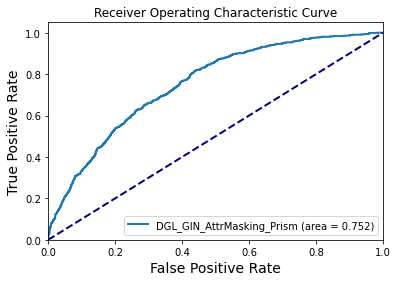

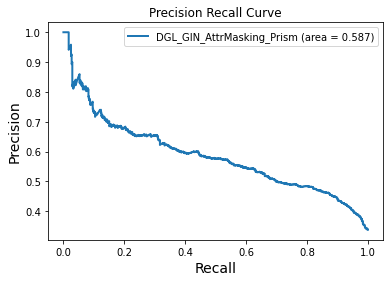

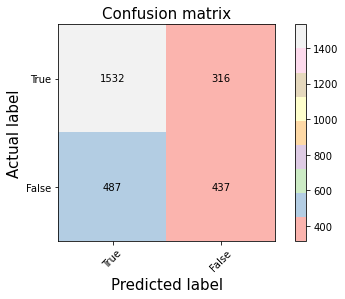

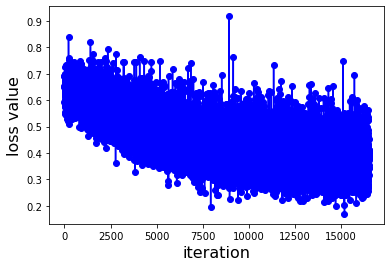

In [22]:
model.train(train, val, test)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69021. Total time 0.00055 hours
Training at Epoch 1 iteration 100 with loss 0.73338. Total time 0.00611 hours
Training at Epoch 1 iteration 200 with loss 0.63295. Total time 0.0125 hours
Validation at Epoch 1, AUROC: 0.49407 , AUPRC: 0.32982 , F1: 0.0 , Cross-entropy Loss: 0.63909 , ***
Training at Epoch 2 iteration 0 with loss 0.65811. Total time 0.015 hours
Training at Epoch 2 iteration 100 with loss 0.75936. Total time 0.02083 hours
Training at Epoch 2 iteration 200 with loss 0.58461. Total time 0.02694 hours
Validation at Epoch 2, AUROC: 0.48765 , AUPRC: 0.32274 , F1: 0.0 , Cross-entropy Loss: 0.64234
Training at Epoch 3 iteration 0 with loss 0.66739. Total time 0.02944 hours
Training at Epoch 3 iteration 100 with loss 0.65132. Total time 0.03527 hours
Training at Epoch 3 iteration 200 with loss 0.64732. Total time 0.04111 hours
Validation at Epoch 3, AUROC: 0.48530 , AUPRC

Training at Epoch 25 iteration 200 with loss 0.39016. Total time 0.36 hours
Validation at Epoch 25, AUROC: 0.73225 , AUPRC: 0.56880 , F1: 0.41708 , Cross-entropy Loss: 0.56203
Training at Epoch 26 iteration 0 with loss 0.36936. Total time 0.36277 hours
Training at Epoch 26 iteration 100 with loss 0.44298. Total time 0.36833 hours
Training at Epoch 26 iteration 200 with loss 0.48259. Total time 0.37444 hours
Validation at Epoch 26, AUROC: 0.71066 , AUPRC: 0.53068 , F1: 0.27272 , Cross-entropy Loss: 0.57893
Training at Epoch 27 iteration 0 with loss 0.41109. Total time 0.37694 hours
Training at Epoch 27 iteration 100 with loss 0.36397. Total time 0.38305 hours
Training at Epoch 27 iteration 200 with loss 0.40028. Total time 0.38888 hours
Validation at Epoch 27, AUROC: 0.72069 , AUPRC: 0.56698 , F1: 0.44843 , Cross-entropy Loss: 0.56733
Training at Epoch 28 iteration 0 with loss 0.43418. Total time 0.39166 hours
Training at Epoch 28 iteration 100 with loss 0.54570. Total time 0.3975 hours

Training at Epoch 50 iteration 0 with loss 0.44394. Total time 0.73027 hours
Training at Epoch 50 iteration 100 with loss 0.46857. Total time 0.73638 hours
Training at Epoch 50 iteration 200 with loss 0.51877. Total time 0.7425 hours
Validation at Epoch 50, AUROC: 0.76907 , AUPRC: 0.61629 , F1: 0.50823 , Cross-entropy Loss: 0.54888
Training at Epoch 51 iteration 0 with loss 0.38435. Total time 0.74555 hours
Training at Epoch 51 iteration 100 with loss 0.31875. Total time 0.75138 hours
Training at Epoch 51 iteration 200 with loss 0.44253. Total time 0.7575 hours
Validation at Epoch 51, AUROC: 0.71543 , AUPRC: 0.56920 , F1: 0.43961 , Cross-entropy Loss: 0.60913
Training at Epoch 52 iteration 0 with loss 0.48112. Total time 0.76027 hours
Training at Epoch 52 iteration 100 with loss 0.38559. Total time 0.76611 hours
Training at Epoch 52 iteration 200 with loss 0.48404. Total time 0.77194 hours
Validation at Epoch 52, AUROC: 0.78116 , AUPRC: 0.63340 , F1: 0.48161 , Cross-entropy Loss: 0.565

Training at Epoch 74 iteration 200 with loss 0.47244. Total time 1.09083 hours
Validation at Epoch 74, AUROC: 0.78566 , AUPRC: 0.63869 , F1: 0.50869 , Cross-entropy Loss: 0.55711
Training at Epoch 75 iteration 0 with loss 0.31546. Total time 1.09361 hours
Training at Epoch 75 iteration 100 with loss 0.38002. Total time 1.09972 hours
Training at Epoch 75 iteration 200 with loss 0.45417. Total time 1.10555 hours
Validation at Epoch 75, AUROC: 0.78633 , AUPRC: 0.62134 , F1: 0.56125 , Cross-entropy Loss: 0.56004
Training at Epoch 76 iteration 0 with loss 0.29936. Total time 1.10861 hours
Training at Epoch 76 iteration 100 with loss 0.38674. Total time 1.11472 hours
Training at Epoch 76 iteration 200 with loss 0.38943. Total time 1.12083 hours
Validation at Epoch 76, AUROC: 0.78566 , AUPRC: 0.61701 , F1: 0.56123 , Cross-entropy Loss: 0.59971
Training at Epoch 77 iteration 0 with loss 0.29222. Total time 1.12361 hours
Training at Epoch 77 iteration 100 with loss 0.30556. Total time 1.13 hour

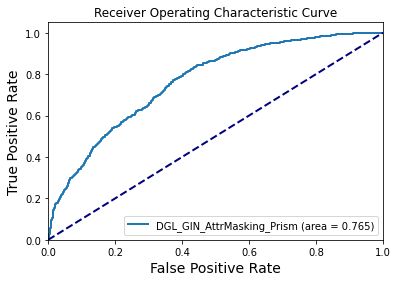

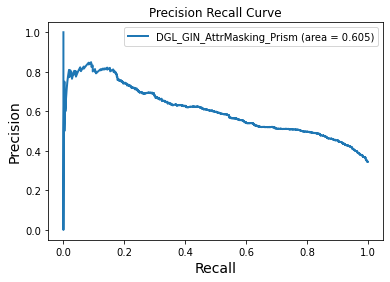

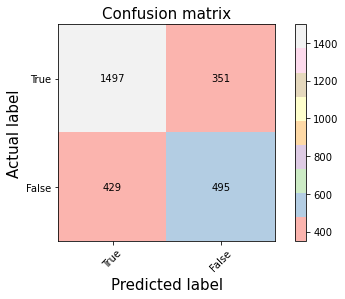

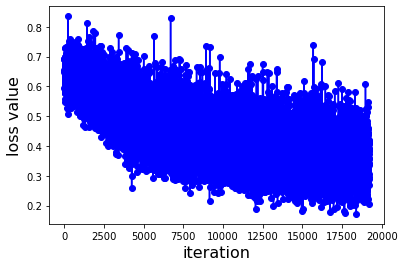

In [20]:
model.train(train, val, test)

In [ ]:
#seed1=1,seed2=10000,20000,30000,7:1:2, 4698/668/923

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69249. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 0.66487. Total time 0.00555 hours
Training at Epoch 1 iteration 200 with loss 0.65519. Total time 0.01083 hours
Validation at Epoch 1, AUROC: 0.48025 , AUPRC: 0.33875 , F1: 0.0 , Cross-entropy Loss: 0.64692 , ***
Training at Epoch 2 iteration 0 with loss 0.66258. Total time 0.01305 hours
Training at Epoch 2 iteration 100 with loss 0.59679. Total time 0.01805 hours
Training at Epoch 2 iteration 200 with loss 0.62719. Total time 0.02305 hours
Validation at Epoch 2, AUROC: 0.52100 , AUPRC: 0.36958 , F1: 0.0 , Cross-entropy Loss: 0.63632 , ***
Training at Epoch 3 iteration 0 with loss 0.59901. Total time 0.02555 hours
Training at Epoch 3 iteration 100 with loss 0.60877. Total time 0.03083 hours
Training at Epoch 3 iteration 200 with loss 0.68835. Total time 0.03583 hours
Validation at Epoch 3, AUROC: 0.5960

Training at Epoch 25 iteration 200 with loss 0.20305. Total time 0.31527 hours
Validation at Epoch 25, AUROC: 0.77228 , AUPRC: 0.57433 , F1: 0.55529 , Cross-entropy Loss: 0.78498
Training at Epoch 26 iteration 0 with loss 0.19201. Total time 0.3175 hours
Training at Epoch 26 iteration 100 with loss 0.22148. Total time 0.32277 hours
Training at Epoch 26 iteration 200 with loss 0.21330. Total time 0.32777 hours
Validation at Epoch 26, AUROC: 0.77288 , AUPRC: 0.57404 , F1: 0.56603 , Cross-entropy Loss: 0.74975
Training at Epoch 27 iteration 0 with loss 0.23929. Total time 0.33027 hours
Training at Epoch 27 iteration 100 with loss 0.25663. Total time 0.33555 hours
Training at Epoch 27 iteration 200 with loss 0.26465. Total time 0.34083 hours
Validation at Epoch 27, AUROC: 0.74523 , AUPRC: 0.54669 , F1: 0.52830 , Cross-entropy Loss: 0.76097
Training at Epoch 28 iteration 0 with loss 0.21489. Total time 0.34333 hours
Training at Epoch 28 iteration 100 with loss 0.24107. Total time 0.34861 ho

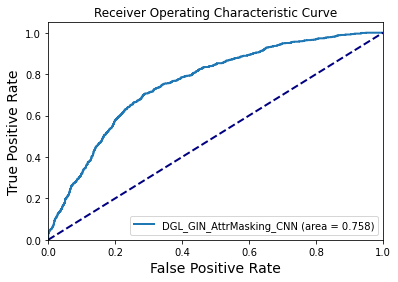

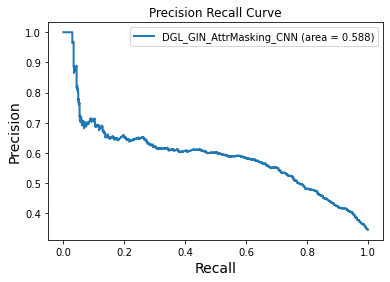

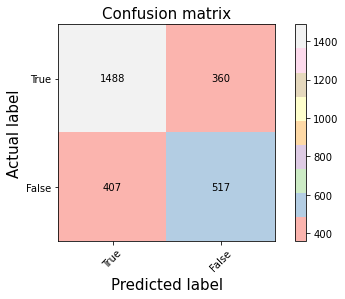

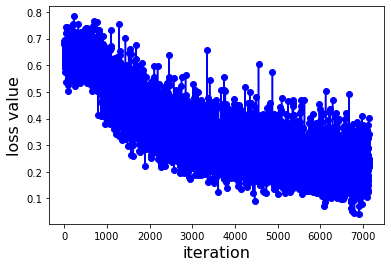

In [20]:
model.train(train, val, test)

In [ ]:
model.save_model('./CNN_GIN_drug_bal_model_fixed')

In [3]:
model = controller.model_pretrained(path_dir = './CNN_GIN_drug_bal_model')
model

Using backend: pytorch


Pretrained model loaded


In [14]:
t_name, t= loader.predict_load('./data/target.txt', 1)

In [15]:
d_name, d= loader.predict_load('./data/drug.txt', 80)

In [16]:
y_pred = controller.classify(X_repurpose = d, 
                             target = t, 
                             model = model, 
                             drug_names = d_name, 
                             target_names = t_name, 
                             result_folder = "./result/", 
                             output_num_max=80)

virtual screening...
in total: 78 drug-target pairs
encoding drug...
unique drugs: 77
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
+------+----------------------+-------------+-------------+-------------+
| Rank |      Drug Name       | Target Name | Interaction | Probability |
+------+----------------------+-------------+-------------+-------------+
|  1   |    Valganciclovir    |  SARS-COV2  |     YES     |     0.99    |
|  2   |      Imiquimod       |  SARS-COV2  |     YES     |     0.98    |
|  3   |     Famciclovir      |  SARS-COV2  |     YES     |     0.97    |
|  4   |     Nitazoxanide     |  SARS-COV2  |     YES     |     0.91    |
|  5   |     Ganciclovir      |  SARS-COV2  |     YES     |     0.90    |
|  6   |     Penciclovir      |  SARS-COV2  |     YES     |     0.85    |
|  7   |      Entecavir       |  SARS-COV2  |     YES     |     0.84    |
|  8   |     Trifluridine     |  SARS-COV2  |     YES     |     0.83    |
|  9   |      Dida

In [17]:
model

In [21]:
#%%
%load_ext autoreload
%autoreload 2
import os
import datautils
from smoothgrad import *
from param import param_num

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
X_drugs, X_targets, y = loader.file2var(input = './data/gra_test.txt')

This function is used to generate dataset from tabular file...
Completed!


In [148]:
drug_encoding, target_encoding = 'DGL_GIN_AttrMasking', 'CNN'

In [149]:
test = processor.encode(X_drugs, X_targets, y, drug_encoding, target_encoding, random_seed = 1)

Drug Target Interaction Prediction...
in total: 1 drug-target pairs
encoding drug...
unique drugs: 1
encoding protein...
unique target sequence: 1
splitting dataset...
Done.


In [150]:
import torch.nn.functional as F

param = config.set(drug_encoding, 
                   target_encoding, 
                   result_folder = "./result/",
                   #input_dim_drug = 1024, 
                   #input_dim_protein = 8420,
                   hidden_dim_drug = 128, 
                   hidden_dim_protein = 128,
                   cls_hidden_dims = [1024,1024,512], 
                   #batch_size = 256, 
                   batch_size = 64, 
                   train_epoch = 5, 
                   LR = 0.001, 
                   cnn_drug_filters = [32,64,96],
                   cnn_drug_kernels = [4,6,8], #odd
                   cnn_target_filters = [32,64,96],
                   cnn_target_kernels = [4,6,8], #odd
                   gnn_hid_dim_drug = 64,
                   gnn_num_layers = 3,
                   gnn_activation = F.relu,
                   in_feats = 74
                  )

In [151]:
import dgl
param['batch_size']=1
def dgl_collate_func(x):
    d, p, y = zip(*x)
    d = dgl.batch(d)
    return d, torch.tensor(p), torch.tensor(y)

import torch
from torch.utils.data import SequentialSampler
from loader import *
params_test = {'batch_size': param['batch_size'],
               'shuffle': False,
               'num_workers': 0,
               'drop_last': False,
                'collate_fn': dgl_collate_func,
               'sampler': SequentialSampler(data_process_loader(test.index.values, test.Label.values, test, **param))}

test_loader = torch.utils.data.DataLoader(data_process_loader(test.index.values, test.Label.values, test, **param), **params_test)

In [152]:
import torch
device = torch.device("cuda")

In [153]:
model = models.CNN_GIN_AttrMasking(**param)

Pretrained model loaded


In [154]:
model_path = ("./CNN_GIN_drug_bal_model/model.pt")
filename = model_path.format("CNN_GIN")
print("Loading model: {}".format(filename))
model.load_state_dict(torch.load(filename, map_location='cpu'))
model = model.to(device)
#print(type(model))

Loading model: ./CNN_GIN_drug_bal_model/model.pt


In [155]:
from smoothgrad import *

batch_size=1

def compute_saliency(model, device, test_loader):

    model.eval()

    identity = "result"
    #saliency_dir = datautils.make_directory(".", "out/saliency")
    saliency_path = os.path.join("./out", identity+'.sal')

    # sgrad = SmoothGrad(model, device=device)
    sgrad = GuidedBackpropSmoothGrad(model, device=device)
    sal = ""
    #for batch_idx, (x0, y0) in enumerate(test_loader):
        #X, Y = x0.float().to(device), y0.to(device).float()
    #print(len(test))
    for batch_idx, (v_d, v_p, label) in enumerate(test_loader):
        X, Y, Z = v_d, v_p.float().to(device), label.to(device)
        #print(X.shape, Y.shape)
        #print(batch_idx)
        guided_saliency_p= sgrad.get_batch_gradients(X, Y, Z)
        # import pdb; pdb.set_trace()
        N, NS, _ = guided_saliency_p.shape # (N, 31, 1, 4)
        
        output = model(X, Y)
        prob = torch.sigmoid(output)
        p_np = prob.to(device='cpu').detach().numpy().squeeze()
        
        #print(N)
        str_sal=[] 
        for i in range(N):
            inr = batch_idx*batch_size + i
            str_sal = datautils.mat2str(np.squeeze(guided_saliency_p[i]))
            #print(p_np)
            #sal += "{}\t{:.6f}\t{}\n".format(inr, p_np, str_sal)
            str_sal
    return str_sal[:-1]
       
    #f = open(saliency_path,"w")
    #f.write(sal)
    #f.close()
    #print(saliency_path)

In [156]:
sal=compute_saliency(model, device, test_loader)

In [157]:
sal

'0.000,0.000,0.016,0.801,0.716,4.142,0.882,6.981,0.647,0.282,8.514,1.378,0.732,0.005,21.498,3.494,7.607,25.100,9.202,1.785,2.971,0.137,30.366,6.389,0.004,1.887,0.000,0.093,0.639,0.003,1.678,0.000,0.000,0.141,3.409,0.011,1.176,9.473,2.961,3.152,6.243,3.353,25.124,4.789,6.223,0.041,35.226,10.032,23.800,30.331,0.018,0.067,2.325,35.302,2.538,0.417,8.461,1.270,4.280,0.913,0.252,1.052,0.000,0.000,0.006,1.747,0.002,0.583,1.600,3.638,3.574,16.203,10.799,9.142,8.510,9.512,7.032,23.816,0.295,20.672,17.264,10.562,0.664,0.175,3.488,3.394,0.121,15.574,2.821,1.411,0.003,0.117,0.164,0.000,0.000,0.040,1.193,0.006,1.967,0.169,1.750,1.921,1.037,10.031,0.950,3.293,0.288,14.096,20.401,9.989,1.385,64.998,14.818,1.397,1.572,0.447,0.287,5.573,0.844,3.295,0.603,2.301,0.250,0.378,0.000,0.000,0.072,0.895,1.773,0.110,8.396,0.227,1.893,10.144,24.178,30.699,7.931,1.306,0.023,1.710,11.345,78.787,9.401,48.205,6.127,1.298,0.001,0.349,1.843,1.848,15.231,3.515,0.921,0.001,0.224,0.000,0.000,0.065,0.001,0.046,0.149,0.179

In [158]:
sal_list=sal.split(",")

In [159]:
test['Target Sequence'][0]

'AAAGGUUUAUACCUUCCCAGGUAACAAACCA'

In [160]:
seq_list=list(test['Target Sequence'][0])

In [161]:
seq = ','.join(seq_list)

In [162]:
print(seq)
for n in range(len(sal_list)//31):
    print(','.join(sal_list[n*31:(n+1)*31]))

A,A,A,G,G,U,U,U,A,U,A,C,C,U,U,C,C,C,A,G,G,U,A,A,C,A,A,A,C,C,A
0.000,0.000,0.016,0.801,0.716,4.142,0.882,6.981,0.647,0.282,8.514,1.378,0.732,0.005,21.498,3.494,7.607,25.100,9.202,1.785,2.971,0.137,30.366,6.389,0.004,1.887,0.000,0.093,0.639,0.003,1.678
0.000,0.000,0.141,3.409,0.011,1.176,9.473,2.961,3.152,6.243,3.353,25.124,4.789,6.223,0.041,35.226,10.032,23.800,30.331,0.018,0.067,2.325,35.302,2.538,0.417,8.461,1.270,4.280,0.913,0.252,1.052
0.000,0.000,0.006,1.747,0.002,0.583,1.600,3.638,3.574,16.203,10.799,9.142,8.510,9.512,7.032,23.816,0.295,20.672,17.264,10.562,0.664,0.175,3.488,3.394,0.121,15.574,2.821,1.411,0.003,0.117,0.164
0.000,0.000,0.040,1.193,0.006,1.967,0.169,1.750,1.921,1.037,10.031,0.950,3.293,0.288,14.096,20.401,9.989,1.385,64.998,14.818,1.397,1.572,0.447,0.287,5.573,0.844,3.295,0.603,2.301,0.250,0.378
0.000,0.000,0.072,0.895,1.773,0.110,8.396,0.227,1.893,10.144,24.178,30.699,7.931,1.306,0.023,1.710,11.345,78.787,9.401,48.205,6.127,1.298,0.001,0.349,1.843,1.848,15.231,3.51

In [163]:
with open('./data/df.txt', 'w+') as f:
    #f.write(str(seq) + '\n')
    for n in range(len(sal_list)//31):
        f.write(','.join(sal_list[n*31:(n+1)*31]) + '\n')

In [164]:
df=pd.read_table('./data/df.txt',sep=',',header=None)

In [165]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.016,0.801,0.716,4.142,0.882,6.981,0.647,0.282,...,0.137,30.366,6.389,0.004,1.887,0.000,0.093,0.639,0.003,1.678
1,0.0,0.0,0.141,3.409,0.011,1.176,9.473,2.961,3.152,6.243,...,2.325,35.302,2.538,0.417,8.461,1.270,4.280,0.913,0.252,1.052
2,0.0,0.0,0.006,1.747,0.002,0.583,1.600,3.638,3.574,16.203,...,0.175,3.488,3.394,0.121,15.574,2.821,1.411,0.003,0.117,0.164
3,0.0,0.0,0.040,1.193,0.006,1.967,0.169,1.750,1.921,1.037,...,1.572,0.447,0.287,5.573,0.844,3.295,0.603,2.301,0.250,0.378
4,0.0,0.0,0.072,0.895,1.773,0.110,8.396,0.227,1.893,10.144,...,1.298,0.001,0.349,1.843,1.848,15.231,3.515,0.921,0.001,0.224
5,0.0,0.0,0.065,0.001,0.046,0.149,0.179,1.802,12.754,0.092,...,4.344,1.099,3.038,7.835,0.265,5.273,0.011,0.033,0.000,0.015


In [166]:
df2=pd.read_table('./data/df2.txt',sep=',',header=None)

In [167]:
import pandas as pd
df3 = pd.Series(list('AAAGGUUUAUACCUUCCCAGGUAACAAACCA'))
df4=(pd.get_dummies(df3)).T

In [168]:
df5=df4.rename(index={'A': '0','U': '1','C': '2','G': '3'})

In [169]:
df6=df5.sort_index()

In [170]:
merge = df6.append(df2, ignore_index=True)

In [171]:
df_final=df*merge

In [172]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.016,0.000,0.000,0.000,0.000,0.000,0.647,0.000,...,0.000,30.366,6.389,0.000,1.887,0.0,0.093,0.000,0.000,1.678
1,0.0,0.0,0.000,0.000,0.000,1.176,9.473,2.961,0.000,6.243,...,2.325,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.121,0.000,0.0,0.000,0.003,0.117,0.000
3,0.0,0.0,0.000,1.193,0.006,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
4,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
5,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000


In [173]:
df_final.max().max()

30.366

In [174]:
df_norm=df_final/df_final.max().max()

In [175]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

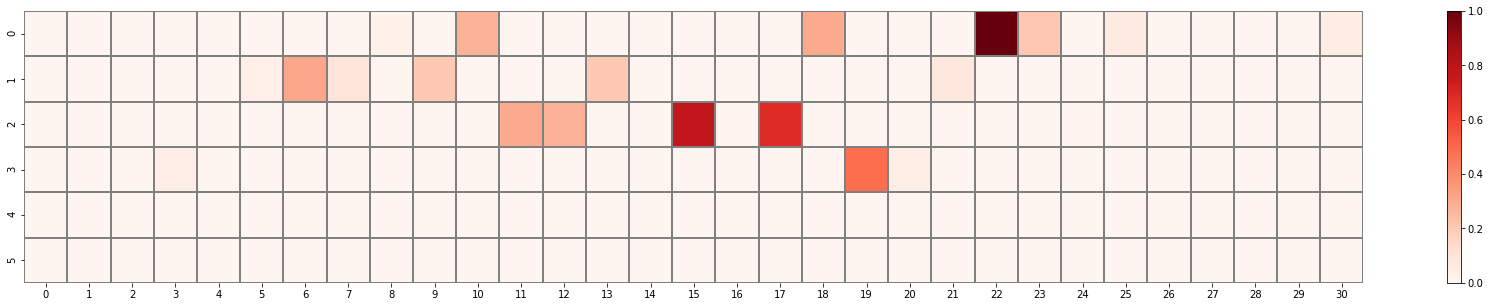

In [176]:
plt.figure(figsize=(30, 5))

h=sns.heatmap(df_norm, cmap='Reds', linewidths=0.1, linecolor='grey',annot=False,cbar=False)
cb = h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=10)  # 设置colorbar刻度字体大小。
#,cbar_kws={"shrink": 0.5}
#plt.savefig("chr.pdf")
plt.show()


In [71]:
df_all=pd.read_table('./data/df.txt',sep=',',header=None)

In [72]:
df_all.max().max()

3.735

In [73]:
df_all_norm=df_all/df_all.max().max()

In [74]:
df_all_norm

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.000000,0.000535,0.002142,0.004552,0.003481,0.077376,0.055689,0.055154,...,0.442303,0.231058,0.004819,0.001071,0.486479,0.125569,0.002142,0.044980,0.000000,0.003481
1,0.0,0.0,0.000535,0.010442,0.000803,0.000000,0.083534,0.039893,0.219545,0.008032,...,0.417938,0.446319,0.008568,0.063989,0.018206,0.088621,0.022222,0.093976,0.003213,0.002142
2,0.0,0.0,0.000000,0.004016,0.000268,0.013922,0.000268,0.118876,0.000268,0.042838,...,0.037751,0.054083,0.004016,0.219813,0.359304,0.001606,0.043909,0.002142,0.000000,0.000535
3,0.0,0.0,0.000000,0.002142,0.000535,0.004819,0.002677,0.001071,0.019813,0.002410,...,0.062383,0.028648,0.149933,0.173762,0.002410,0.025167,0.025971,0.102276,0.000000,0.001339
4,0.0,0.0,0.000268,0.002677,0.006961,0.015797,0.003748,0.022222,0.004284,0.035341,...,0.010977,0.005890,0.242838,0.000000,0.484337,0.148862,0.058099,0.006426,0.001339,0.000000
5,0.0,0.0,0.000268,0.000000,0.000268,0.006426,0.006158,0.000268,0.004819,0.052744,...,0.135743,0.006426,0.000803,0.245783,0.006158,0.189290,0.004819,0.014458,0.000803,0.000000


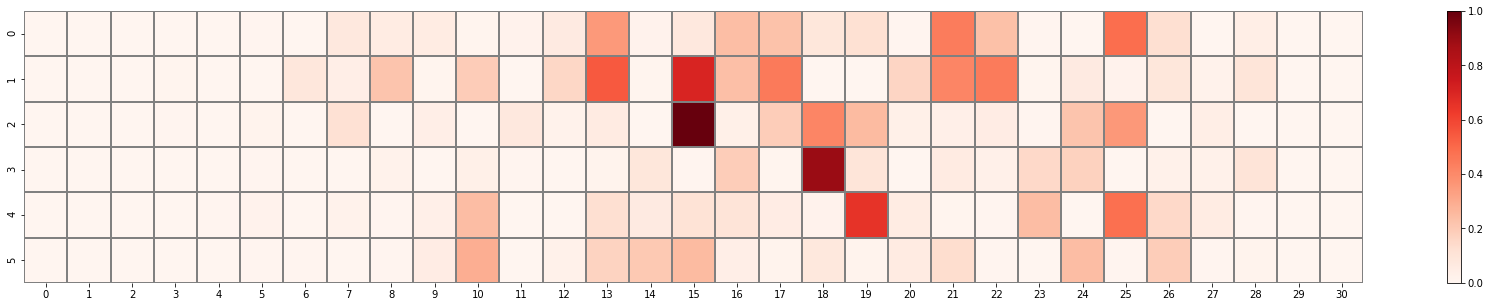

In [75]:
plt.figure(figsize=(30, 5))

h=sns.heatmap(df_all_norm, cmap='Reds', linewidths=0.1, linecolor='grey',annot=False,cbar=False)
cb = h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=10)  # 设置colorbar刻度字体大小。
#,cbar_kws={"shrink": 0.5}
#plt.savefig("chr.pdf")
plt.show()


In [81]:
t_name, t= loader.predict_load('./data/target2.txt', 1)

In [82]:
d_name, d= loader.predict_load('./data/drug.txt', 80)

In [83]:
model = controller.model_pretrained(path_dir = './CNN_GIN_drug_bal_model')
model

Pretrained model loaded


In [84]:
y_pred = controller.classify(X_repurpose = d, 
                             target = t, 
                             model = model, 
                             drug_names = d_name, 
                             target_names = t_name, 
                             result_folder = "./result/", 
                             output_num_max=80)

virtual screening...
in total: 78 drug-target pairs
encoding drug...
unique drugs: 77
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
+------+----------------------+-----------------+-------------+-------------+
| Rank |      Drug Name       |   Target Name   | Interaction | Probability |
+------+----------------------+-----------------+-------------+-------------+
|  1   |       Loviride       | Single-stranded |      NO     |     0.26    |
|  2   |     Chloroquine      | Single-stranded |      NO     |     0.17    |
|  3   |      Letermovir      | Single-stranded |      NO     |     0.17    |
|  4   |  Hydroxychloroquine  | Single-stranded |      NO     |     0.14    |
|  5   |      Indinavir       | Single-stranded |      NO     |     0.06    |
|  6   |      Amprenavir      | Single-stranded |      NO     |     0.02    |
|  7   |      Vicriviroc      | Single-stranded |      NO     |     0.01    |
|  8   |       Arbidol        | Single-stranded |   

In [ ]:
#drug visualization

In [6]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

In [16]:
smiles='CC(=O)OC1=CC=CC=C1C(=O)NC2=NC=C(S2)[N+](=O)[O-]'

In [17]:
m = Chem.MolFromSmiles(smiles)

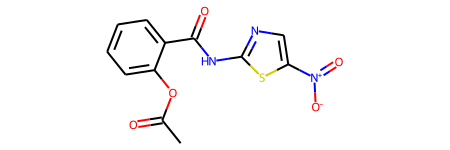

In [18]:
m

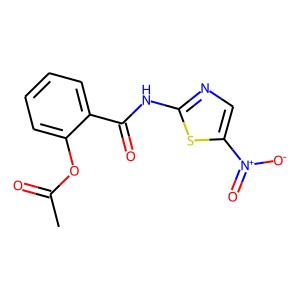

In [19]:
def moltosvg(mol, molSize = (300,300), kekulize = True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

SVG(moltosvg(m))

In [ ]:
#disney test

In [7]:
model = controller.model_pretrained(path_dir = './CNN_GIN_drug_bal_model')
model

Using backend: pytorch


Pretrained model loaded


In [14]:
t_name, t= loader.predict_load('./data/mir21_target.txt', 3)

In [15]:
d_name, d= loader.predict_load('./data/mir21_drug.txt', 3)

In [16]:
y_pred = controller.classify(X_repurpose = d, 
                             target = t, 
                             model = model, 
                             drug_names = d_name, 
                             target_names = t_name, 
                             result_folder = "./result/", 
                             output_num_max=10)

virtual screening...
in total: 9 drug-target pairs
encoding drug...
unique drugs: 3
encoding protein...
unique target sequence: 3
Done.
predicting...
---------------
+------+-----------+-------------+-------------+-------------+
| Rank | Drug Name | Target Name | Interaction | Probability |
+------+-----------+-------------+-------------+-------------+
|  1   |     1     |  miR21_hx2  |     YES     |     0.80    |
|  2   |     1a    |  miR21_hx2  |     YES     |     0.80    |
|  3   |     2     |  miR21_hx2  |     YES     |     0.73    |
|  4   |     1     |   miR21_st  |      NO     |     0.24    |
|  5   |     1a    |   miR21_st  |      NO     |     0.21    |
|  6   |     2     |   miR21_st  |      NO     |     0.17    |
|  7   |     2     |  miR21_hx1  |      NO     |     0.00    |
|  8   |     1     |  miR21_hx1  |      NO     |     0.00    |
|  9   |     1a    |  miR21_hx1  |      NO     |     0.00    |
+------+-----------+-------------+-------------+-------------+

In [75]:
C1='COc1ccc(Br)cc1C(=O)Nc4ccc(c3nc2ccccc2[nH]3)cc4'

In [ ]:
C2

In [ ]:
C3

In [ ]:
C4

In [ ]:
C5

In [83]:
C5='CNc2nc(Nc1cccc(C(=O)O)c1)nc3ccccc23'

In [47]:
sm1='COC(=O)CCCOc5ccc(c4nc3ccc(c2ccc(N1CCN(C)CC1)cc2)cc3[nH]4)cc5'

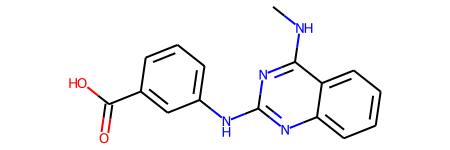

In [48]:
from rdkit import Chem
Chem.MolFromSmiles(C5)

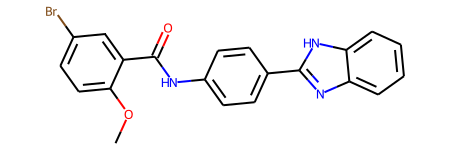

In [76]:
Chem.MolFromSmiles(C1)

In [20]:
#%%
%load_ext autoreload
%autoreload 2
import os
import datautils
from smoothgrad import *
from param import param_num

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
X_drugs, X_targets, y = loader.file2var(input = './data/gra_test.txt')

This function is used to generate dataset from tabular file...
Completed!


In [22]:
drug_encoding, target_encoding = 'DGL_GIN_AttrMasking', 'CNN'

In [23]:
test = processor.encode(X_drugs, X_targets, y, drug_encoding, target_encoding, random_seed = 1)

Drug Target Interaction Prediction...
in total: 1 drug-target pairs
encoding drug...
unique drugs: 1
encoding protein...
unique target sequence: 1
splitting dataset...
Done.


In [24]:
import torch.nn.functional as F

param = config.set(drug_encoding, 
                   target_encoding, 
                   result_folder = "./result/",
                   #input_dim_drug = 1024, 
                   #input_dim_protein = 8420,
                   hidden_dim_drug = 128, 
                   hidden_dim_protein = 128,
                   cls_hidden_dims = [1024,1024,512], 
                   #batch_size = 256, 
                   batch_size = 64, 
                   train_epoch = 5, 
                   LR = 0.001, 
                   cnn_drug_filters = [32,64,96],
                   cnn_drug_kernels = [4,6,8], #odd
                   cnn_target_filters = [32,64,96],
                   cnn_target_kernels = [4,6,8], #odd
                   gnn_hid_dim_drug = 64,
                   gnn_num_layers = 3,
                   gnn_activation = F.relu,
                   in_feats = 74
                  )

In [25]:
import dgl
param['batch_size']=1
def dgl_collate_func(x):
    d, p, y = zip(*x)
    d = dgl.batch(d)
    return d, torch.tensor(p), torch.tensor(y)

import torch
from torch.utils.data import SequentialSampler
from loader import *
params_test = {'batch_size': param['batch_size'],
               'shuffle': False,
               'num_workers': 0,
               'drop_last': False,
                'collate_fn': dgl_collate_func,
               'sampler': SequentialSampler(data_process_loader(test.index.values, test.Label.values, test, **param))}

test_loader = torch.utils.data.DataLoader(data_process_loader(test.index.values, test.Label.values, test, **param), **params_test)

In [26]:
import torch
device = torch.device("cuda")

In [27]:
model = models.CNN_GIN_AttrMasking(**param)

Pretrained model loaded


In [28]:
model_path = ("./CNN_GIN_drug_bal_model/model.pt")
filename = model_path.format("CNN_GIN")
print("Loading model: {}".format(filename))
model.load_state_dict(torch.load(filename, map_location='cuda'))
model = model.to(device)
#print(type(model))

Loading model: ./CNN_GIN_drug_bal_model/model.pt


In [29]:
from smoothgrad import *

batch_size=1

def compute_saliency(model, device, test_loader):

    model.eval()

    identity = "result"
    #saliency_dir = datautils.make_directory(".", "out/saliency")
    saliency_path = os.path.join("./out", identity+'.sal')

    # sgrad = SmoothGrad(model, device=device)
    sgrad = GuidedBackpropSmoothGrad(model, device=device)
    sal = ""
    #for batch_idx, (x0, y0) in enumerate(test_loader):
        #X, Y = x0.float().to(device), y0.to(device).float()
    #print(len(test))
    for batch_idx, (v_d, v_p, label) in enumerate(test_loader):
        X, Y, Z = v_d, v_p.float().to(device), label.to(device)
        #print(X.shape, Y.shape)
        #print(batch_idx)
        guided_saliency_p= sgrad.get_batch_gradients(X, Y, Z)
        # import pdb; pdb.set_trace()
        N, NS, _ = guided_saliency_p.shape # (N, 31, 1, 4)
        
        output = model(X, Y)
        prob = torch.sigmoid(output)
        p_np = prob.to(device='cpu').detach().numpy().squeeze()
        
        #print(N)
        str_sal=[] 
        for i in range(N):
            inr = batch_idx*batch_size + i
            str_sal = datautils.mat2str(np.squeeze(guided_saliency_p[i]))
            #print(p_np)
            #sal += "{}\t{:.6f}\t{}\n".format(inr, p_np, str_sal)
            str_sal
    return str_sal[:-1]
       
    #f = open(saliency_path,"w")
    #f.write(sal)
    #f.close()
    #print(saliency_path)

In [30]:
sal=compute_saliency(model, device, test_loader)

In [31]:
sal_list=sal.split(",")

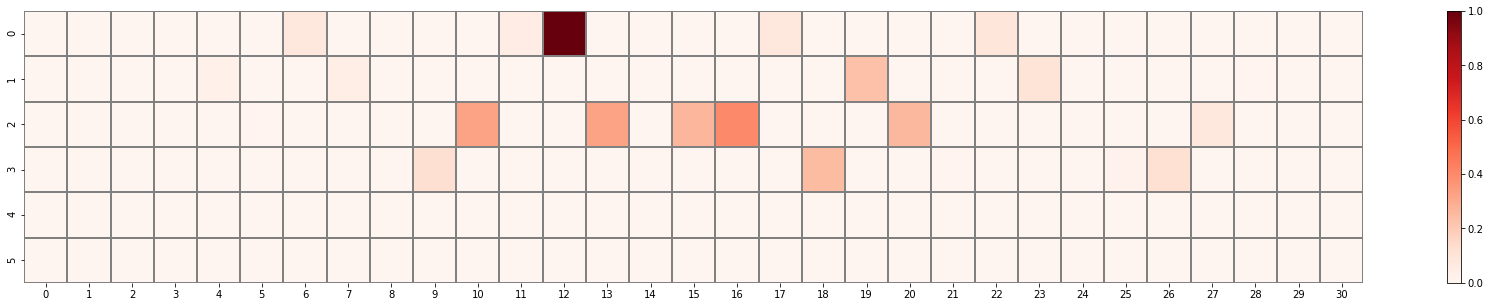

In [32]:
test['Target Sequence'][0]
seq_list=list(test['Target Sequence'][0])
seq = ','.join(seq_list)
with open('./data/df.txt', 'w+') as f:
    #f.write(str(seq) + '\n')
    for n in range(len(sal_list)//31):
        f.write(','.join(sal_list[n*31:(n+1)*31]) + '\n')
df=pd.read_table('./data/df.txt',sep=',',header=None)
df2=pd.read_table('./data/df2.txt',sep=',',header=None)
import pandas as pd
df3 = pd.Series(list('AAUCUCAUGGCAACACCAGUCGAUGGGCUGU'))
df4=(pd.get_dummies(df3)).T
df5=df4.rename(index={'A': '0','U': '1','C': '2','G': '3'})
df6=df5.sort_index()
merge = df6.append(df2, ignore_index=True)
df_final=df*merge
df_final
df_final.max().max()
df_norm=df_final/df_final.max().max()
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
plt.figure(figsize=(30, 5))
h=sns.heatmap(df_norm, cmap='Reds', linewidths=0.1, linecolor='grey',annot=False,cbar=False)
cb = h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=10)  # 设置colorbar刻度字体大小。
#,cbar_kws={"shrink": 0.5}
#plt.savefig("chr.pdf")
plt.show()
